# Impurity Model for nEXO

This Jupyter notebook was made so simply and easily plot the expected outgassing rate of a piece of material in a given system. 

## 1) Imports
We start off by importing a few necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

Next we are goint to load the 3 pieces of code that contain all the information for this model. The first one is 'Library.py' which contains the parameters of various setups as well as materials to be used in that given setup. Before running this notebook you want to make sure that your combination of setup and material is entered correctly.

In [2]:
import Library as Lib 
import Outgassing as Out
from RunModel import * 

## 2) Define System
The class `System` will load the necessary information from `Library.py` by defining 4 key parameters: The name of the system (`Setup`), the material inside that setup that is outgassing (`Material`), the gas species that is dissolved inside the material (`Solute`) and the dimension of that piece of material (`Version`). 
In this example we want to plot the outgassing of oxygen from the piece of EXO-200 Teflon that we have at Yale. 

In [3]:
S1 = System(Setup='YLXPS', Material='Teflon', Solute='Oxygen', Version='EXO-Teflon')

You can check the values that go into getting the outgassing for this particular setup by executing

In [4]:
S1.Print() 

Name: YLXPS
 Material: Teflon
 Solute: Oxygen
 Version: EXO-Teflon
 Constraints: []
 ConstraintIndex: []
 Diffusion: 3.14e-07
 Solubility: 0.22
 ActivationEnergy: 0.17
 Abundance: 0.21
 MolarMass: 32
 XeMass: 2170
 Volume: 0.0053
 Area: 390.32180000000005
 Thickness: 0.15


Sets time regions for the above defined temperature values. The first element of Points is always 0, followed by the end of the first region and then the end of the second region. This example code will give you $\frac{100-0}{0.1}$ points from 0 to 100 and $\frac{200-100}{0.1}$ points from 100 to 200.

In [5]:
S1.Time = GetTimeStamps(Points=[0, 2, 20], Spacing=0.001, TimeScale='Days')

Define the different temperatures for which to calculate outgassing. Note that `Temperature` should always be of type list even if only one value is used. Then add it to your setup. 

In [6]:
T1 = np.array([293.15]*len(S1.Time[0]))
T3 = np.array([164.0]*len(S1.Time[1]))
Temperature = [T1, T3]
S1.Temp = Temperature  

In [7]:
S1.Constraints = [1000000,10000000,1000000]

## 3) Calculate Outgassing
Calculate the diffusion constants for the above defined temperatures using the Arrhenius equation defined in `Outgassing.py`.

In [8]:
S1.DiffConstants = Out.GetDiffTemp(S1, Temperatures=S1.Temp)    

Get the initial number of impurities from model parameters. You are able to get the number of impurities in a variety of units. You can choose between total number of impurities (`'#'`), ratio between number of impurities and number of xenon atoms in the setup (`'ppm','ppb','ppt'`) or the total mass of impurities `'Mass'`. 

In [9]:
S1.InitialImpurities = Out.GetInitialImpurities(S1, Units='#')

Define the labels for the plot. This should contain the name of the setup, the temperature and the thickness of the material.

In [10]:
S1.Labels = GetLabels([S1], Temperature)[0]

Calculate the number of impurities left in the sample as a function of time by using the solution to the diffusion equation defined in `Outgassing.py`

In [11]:
S1.Impurities = Out.GetImpuritiesVsTime(Data=S1, TimeScale='Hours')

6.582798749999999e+18
1.4845351258265648e+17


Calculate the outgassing rate as a function of time using Fick's 1st law, which is also defined in `Outgassing.py`

In [12]:
S1.FlowRate = Out.GetFlowRateVsTime(Data=S1, Units='mBar Liter', TimeScale='Hours')

[array([4.93609860e+17, 4.85812550e+17, 4.82541358e+17, ...,
       1.48600854e+17, 1.48527165e+17, 1.48453513e+17])
 array([1.48453513e+17, 1.48315755e+17, 1.48246231e+17, ...,
       1.25965928e+17, 1.25965303e+17, 1.25964677e+17])]
[9.31339357951287e+16, 2.8010096713708772e+16]


## 4) Plotting
Now one can easily plot the number of impurities left in the material and the outgassing rate expected from that material 

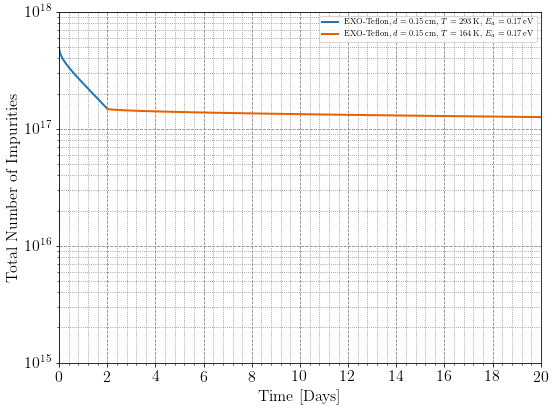

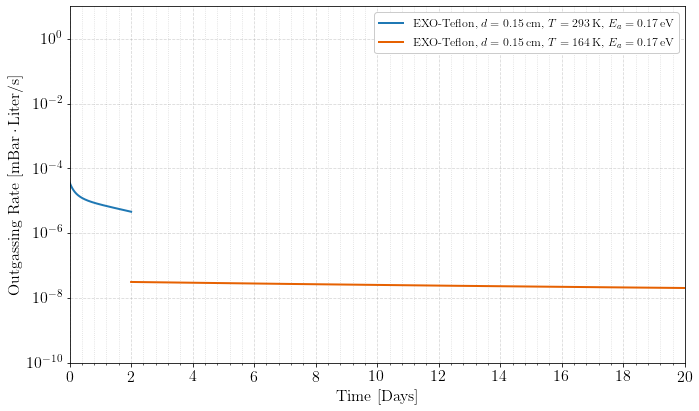

In [13]:
PlotImpuritiesVsTime([S1], XRange=[0,20], YRange=[1E15, 1E18], XTicks=2, TimeScale='Days', Size=(10,6))
PlotFlowRateVsTime([S1], XRange=[0,20], YRange=[1E-10, 1E1], XTicks=2, TimeScale='Days', Size=(10,6))